Importing all the useful libraries Which we'll use in the dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("abalone.csv")

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Description of the data set

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

The other measurments provided to us are as follows:
1. Sex ------------> Determines the sex of abalone ,categorized as (M,F and I)
2. Length ---------> Longest shell measurement(in mm)
3. Diameter -------> Perpendicular to length(in mm)
4. Height ---------> with meat in shell (in mm)
5. Whole weight ---> whole abalone(in grams)
6. Shucked weight -> weight of meat(in grams)
7. Viscera weight -> gut weight (after bleeding)(in grams)
8. Shell weight ---> after being dried(in grams)
9. Rings ----------> size of rings 

We have to claculate the size of rings with the help of given features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.shape

(4177, 9)

The dataset contains :
1. Number of columns = 9
2. number of rows    = 4177

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

sex contains nominal data i.e M,F and I.Therefore we will encode it later for further analysis.

In [7]:
#checking for null values

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null Values present in the dataset.

In [9]:
#using heat map to confirm the presence of null values

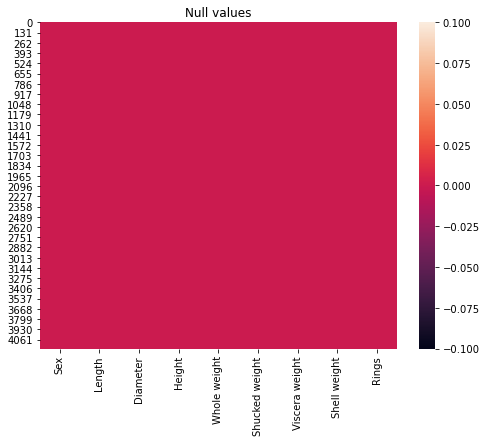

In [10]:
plt.figure(figsize = [8,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show() 

Since there are no white spots or boxes(respresent null values) present in the graph.therefore,No null values are present in any of the feature.

In [11]:
#statistical analysis

In [12]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [13]:
#analysis of the Features using visualization

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


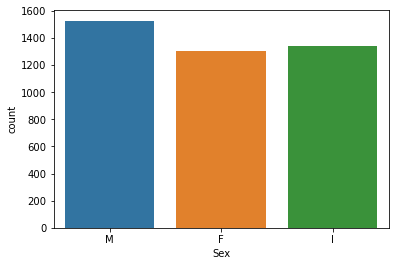

In [14]:
ax= sns.countplot(x = 'Sex',data = df)
print(df['Sex'].value_counts())

Here we can see that all the three cateories are almost equaly distributed.

In [15]:
#visualization for continous data

In [16]:
df_visuals_cont = df[["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"]]

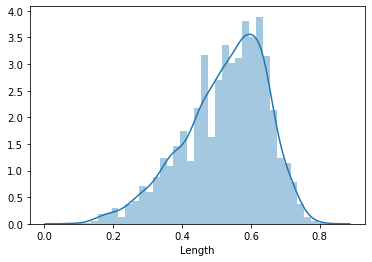

In [17]:
sns.distplot(df_visuals_cont["Length"],kde =True )

the the is almost eaqaully distributed but very little left skewed

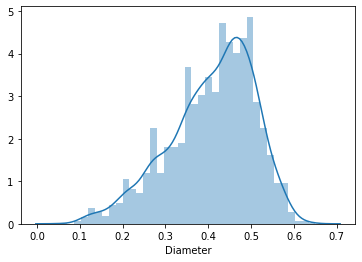

In [18]:
sns.distplot(df_visuals_cont["Diameter"],kde =True )

The diameter is little left skewed.

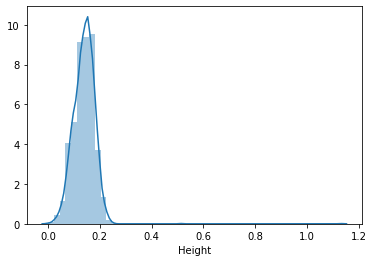

In [19]:
sns.distplot(df_visuals_cont["Height"],kde =True )

the data is equally distributed from 0.0 to 0.2.No skewnes present.

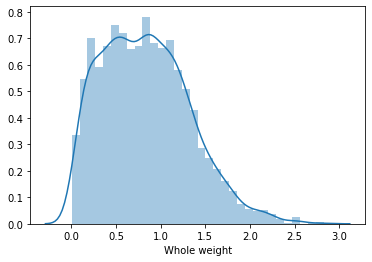

In [20]:
sns.distplot(df_visuals_cont["Whole weight"],kde =True )

The data is not equally distributed . it is highly spreaded.

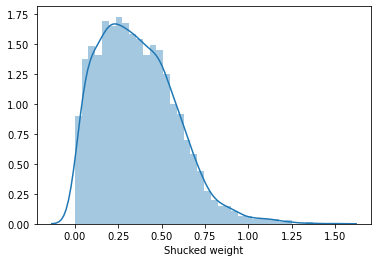

In [21]:
sns.distplot(df_visuals_cont["Shucked weight"],kde =True )

The data is spreaded from 0.0 to 0.75. A little bit Right skewed.

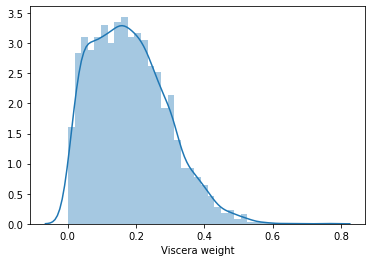

In [22]:
sns.distplot(df_visuals_cont["Viscera weight"],kde =True )

The data is spreaded from 0.0 to 0.4 . A little bit rightly skewed.

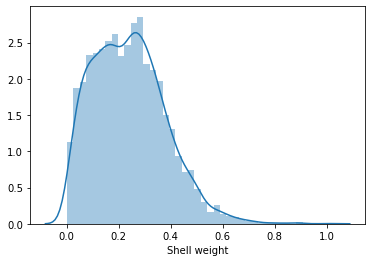

In [23]:
sns.distplot(df_visuals_cont["Shell weight"],kde =True )

The data is highly spreaded from 0.0 to 0.4. Right Skewed.

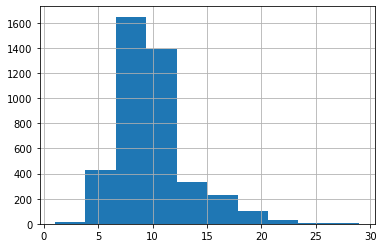

In [24]:
df["Rings"].hist(grid = True) 

Here we can see that Maximum number of rings lies 

In [27]:
#using ordinal encoder to  convert sex feature.

In [28]:
from sklearn.preprocessing import LabelEncoder
oe = LabelEncoder()
df["Sex"] = oe.fit_transform(df["Sex"])

In [29]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### Checking relationship of features with each other.

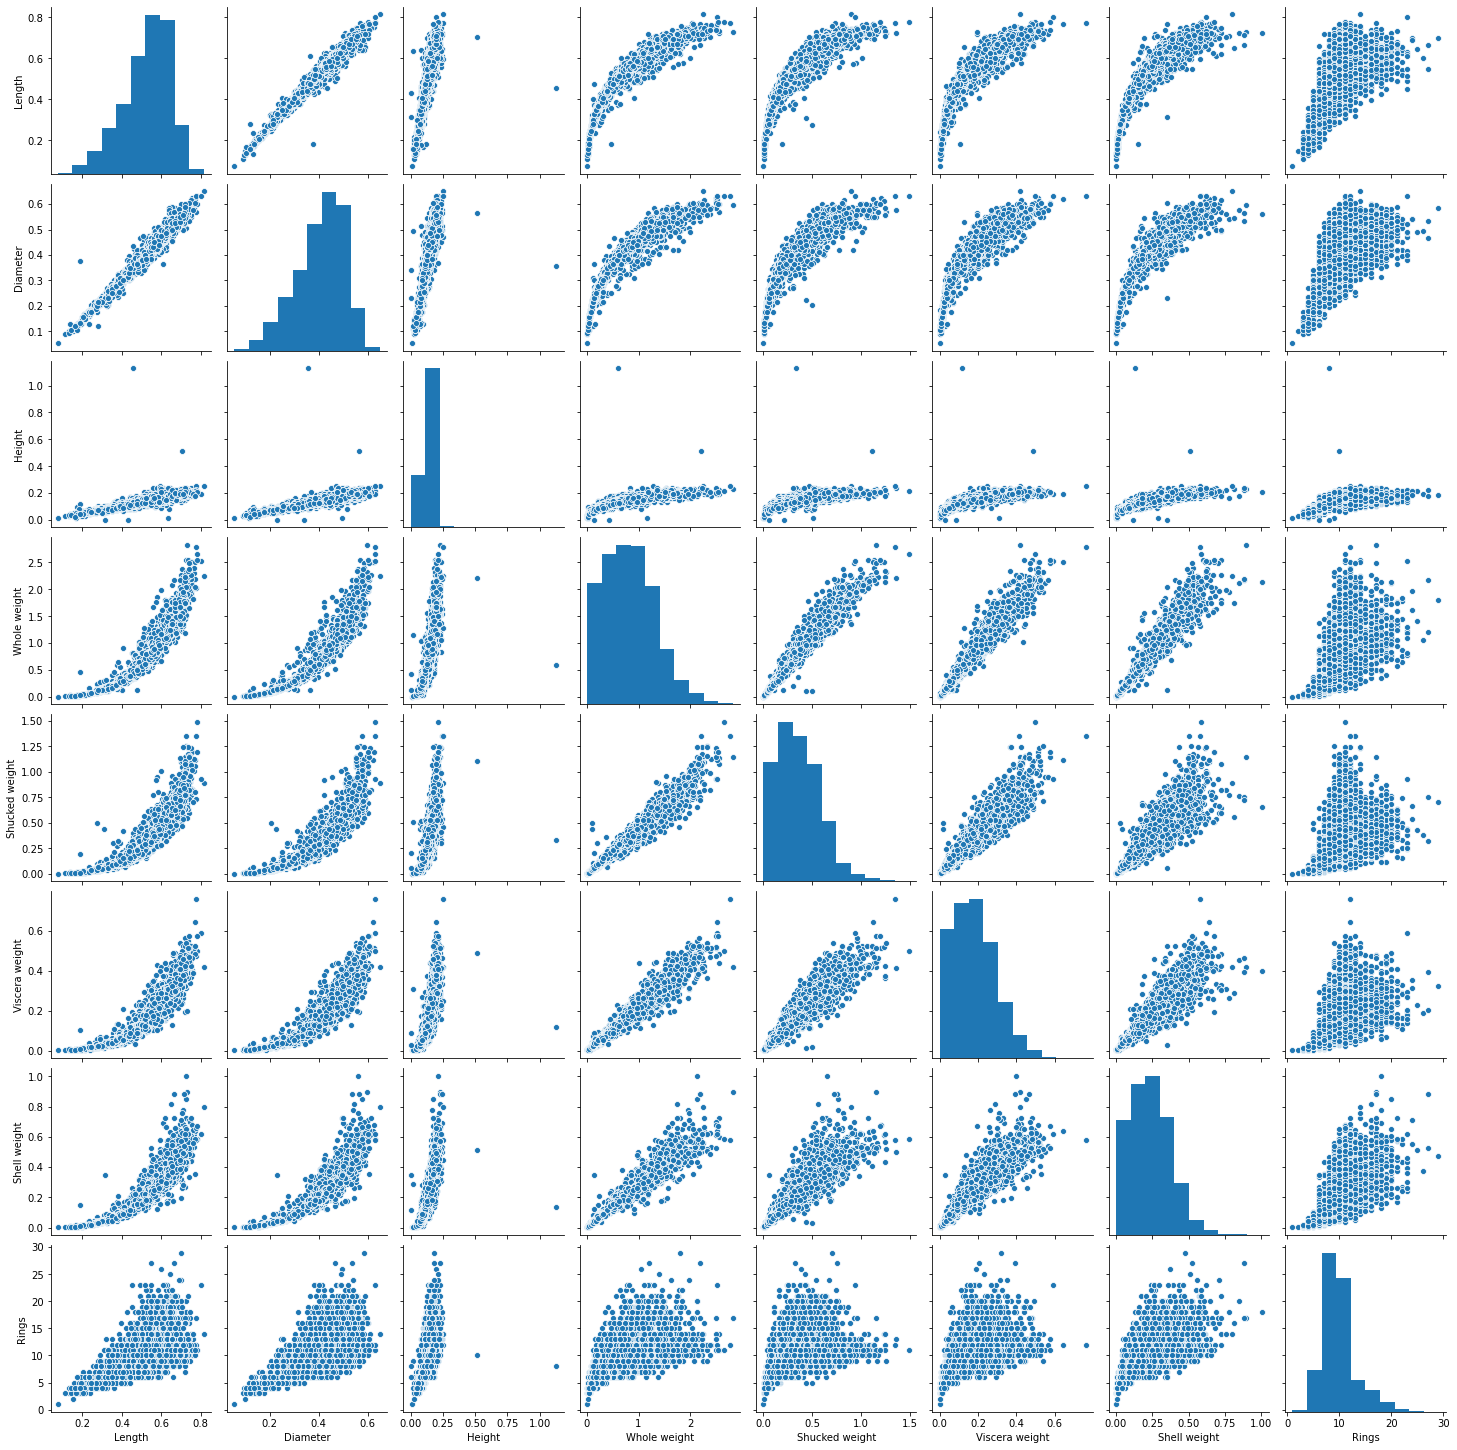

In [26]:
sns.pairplot(df)

Observations: We can see the following relationship among the features.
1. When the length of the shell increases it's diameter also increases,showing a linear relationship and vice-versa.
2. when whole weight increases the length increases as square root of whole weight.Length shows similar relationship with shucked weight ,viscera weight and shell weight.
3. Since Length of the shell and diameter of the shell shows a linear relationship. therefore we can see that both of them shows similar relationship with other variables.
4. when length and diameter increases from 0.0 to 0.6 (mm) height of the shell ranges from 0 to approximately 0.3.
5. When whole weight of the shell increases the shucked weight ,viscera weight and the shell weight also increases.
6. shucked weight ,viscera weight and shell weight shows linear relationship with each other therefore,they shows similar relationship with ther features.
7. when ring size increases from 0to 30 (mm) the height ranges from 0.00 to 0.25.

In [30]:
#we will be ploting the sex feature seperately for better under standing.

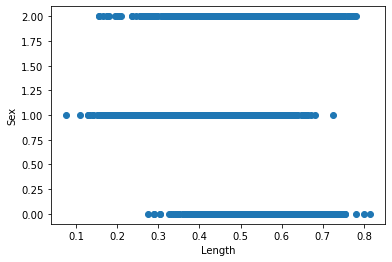

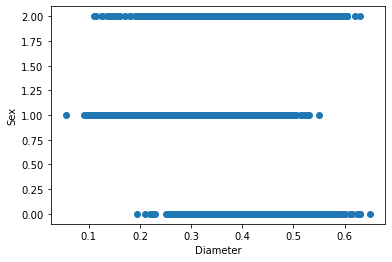

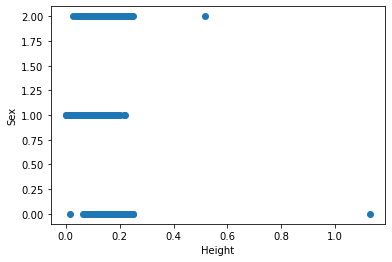

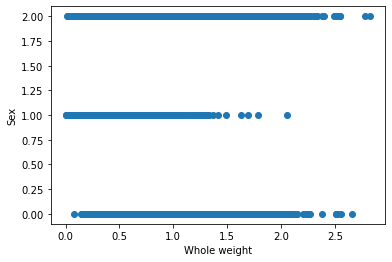

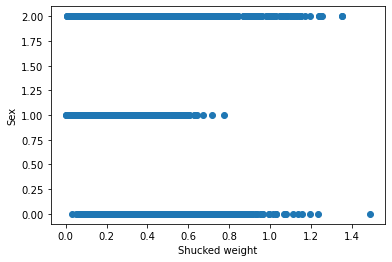

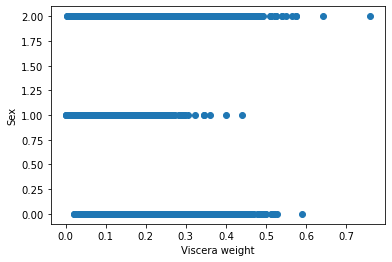

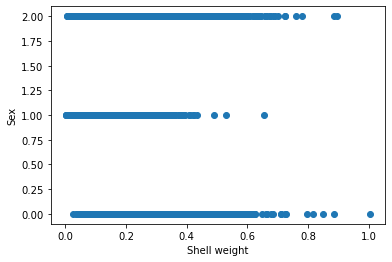

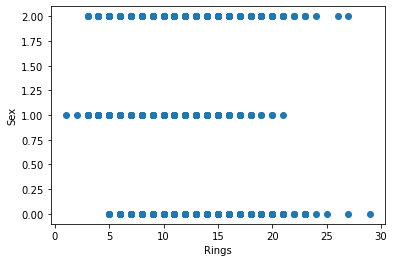

In [31]:
for i in df[["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]]:
    x = df[i]
    y = df["Sex"]
    plt.xlabel(i)
    plt.ylabel("Sex")
    plt.scatter(x,y)
    plt.show()

Here 0 indicates Female(F),1 indicates Infant(I) and 2 indicates male (M).
Observations:
1. when length is greater than 0 less than 0.2 all the shells are Infant. above that either male or infant till approximately 0.3.After wards Can be any of the three.
2. Similar relation ship with diameter.
3. All three sex have almost same height range.
4. Infant whole weight ranges from 0.0 to 1.5 ,Male whole weight ranges from 0.0 to nearly 2.5 and for female it ranges from 0.0 to less tan 2.5.
5. Infant shucked weight range(0.0 to 0.6), Male shucked weight range(0.0 to 1.2),female shucked weight range(0 to 1.0) with some outliers.
6. Viscera weight of infant ranges (0 to 0.3),male(0 to 0.5) and for female (0 to more than 0.5)
7. Shell Weight of infant ranges(0 to above 0.4),male (0 to approximately 0.7) and female (0 to 0.6).Also some outliers are present above there max range.
8. rings ,infant have at least 1 ring and atmost 21,male has atleast 3 rings and atmost 27.and female has atleast 5 rings and atmost 29 rings.

In [32]:
# Relationship of features with target variable

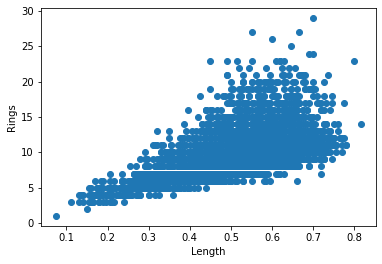

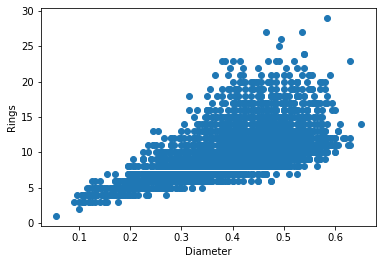

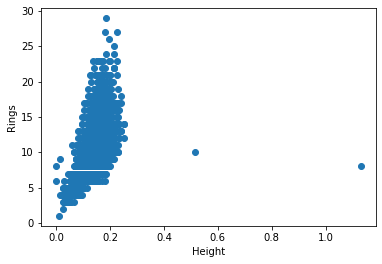

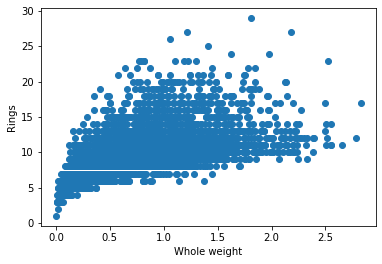

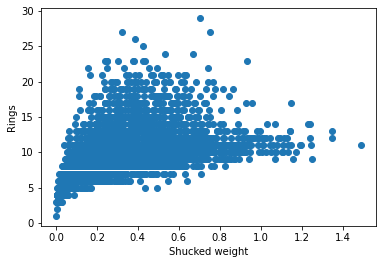

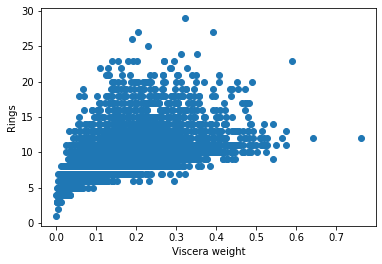

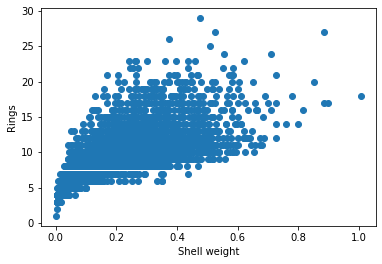

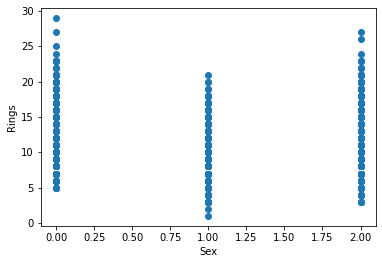

In [33]:
for i in df[["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Sex"]]:
    x = df[i]
    y = df["Rings"]
    plt.xlabel(i)
    plt.ylabel("Rings")
    plt.scatter(x,y)
    plt.show()

Observation:
1. When ring size increases from 0 to 30 (mm) the height ranges from 0.00 to 0.25 approximately.
2. rings ,infant have at least 1 ring and atmost 21,male has atleast 3 rings and atmost 27.and female has atleast 5 rings and atmost 29 rings.

Conclusion: we cocluded that soe of the features are highly correlated to each other. Some of them do not show any relation. And only some features shows a relation with Target variable.

In [34]:
#using box plot for checking outliers only for continous features ,excluding target variable.

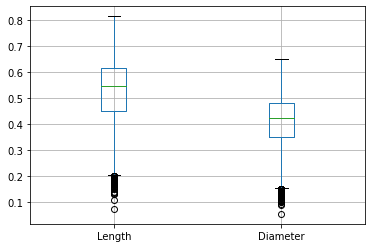

In [35]:
df.boxplot(column = ['Length',"Diameter"])

Some outliers are present near lower whiskers.They are very close to the whisker so we'll keep them.

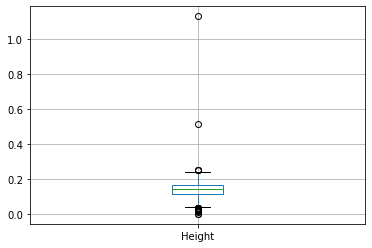

In [36]:
df.boxplot(column = 'Height')

we can see two outliers are present very far from the whisker.but there are very small in number so we can keep them.

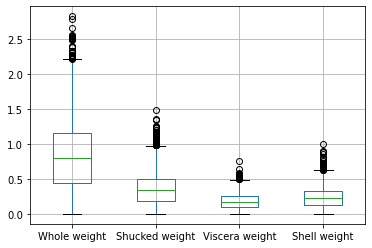

In [37]:
df.boxplot(column = ["Whole weight","Shucked weight","Viscera weight","Shell weight"])

we can see a large number of outliers are present in the following features we'll be removing them.

In [38]:
corr_matrix = df.corr()

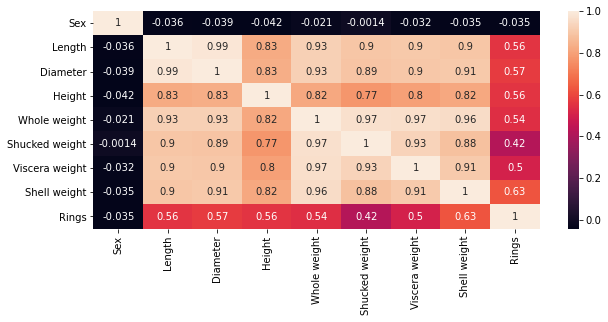

In [39]:
plt.figure(figsize = [10,4])
sns.heatmap(corr_matrix,annot = True)

Observations:
1. Length and diameter are highly correlated(0.99)
2. We can see that all features except sex and Rings are highly correlated to each other showing a corr value greater than 0.77.

In [40]:
#cheking the correlation of features with target.

In [41]:
print(corr_matrix['Rings'].sort_values(ascending = False))

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64


Conclusion:  
1. Shell weight(0.62) is the most correlated feature with the Rings.
2. Diameter ,Height ,Length ,whole weight and viscera weight shows almost same correlation with Rings ,ranges(0.57 to 0.50)
3. Sex is least co relaed to the rings ,i.e., -0.0346.

We'll be keeping all Features for model building.

In [42]:
#checking range of each feature.

In [43]:
def rangei(data_frame,feature_name):
    maximum_value = data_frame[feature_name].max()
    minimum_value = data_frame[feature_name].min()
    rangee = maximum_value - minimum_value
    print("maximum Value is : ",maximum_value)
    print("minimum value is : ",minimum_value)
    print("Range of ",feature_name," feature is :", rangee)

In [44]:
for i in df:
    rangei(df,i)

maximum Value is :  2
minimum value is :  0
Range of  Sex  feature is : 2
maximum Value is :  0.815
minimum value is :  0.075
Range of  Length  feature is : 0.74
maximum Value is :  0.65
minimum value is :  0.055
Range of  Diameter  feature is : 0.595
maximum Value is :  1.13
minimum value is :  0.0
Range of  Height  feature is : 1.13
maximum Value is :  2.8255
minimum value is :  0.002
Range of  Whole weight  feature is : 2.8235
maximum Value is :  1.4880000000000002
minimum value is :  0.001
Range of  Shucked weight  feature is : 1.4870000000000003
maximum Value is :  0.76
minimum value is :  0.0005
Range of  Viscera weight  feature is : 0.7595000000000001
maximum Value is :  1.005
minimum value is :  0.0015
Range of  Shell weight  feature is : 1.0034999999999998
maximum Value is :  29
minimum value is :  1
Range of  Rings  feature is : 28


as we cam see that most of the feature ranges from 0.7 to 2 and minimum value is almost near to 0.1.so we can keep the outliers as the feature range is very small.

In [157]:
#removing outliers using zscorevalue
from scipy.stats import zscore
z = np.abs(zscore(df))

In [158]:
threshold = 3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [159]:
df_new1 = df[(z<3).all(axis = 1)]

In [160]:
df_new1.shape

(4027, 9)

In [164]:
df.shape

(4177, 9)

In [165]:
print("Total Data loss is ",((4177-4027)/4177)*100)

Total Data loss is  3.5910940866650707


In [45]:
#separating dependent feature and independent features

In [180]:
x = df_new1.drop("Rings",axis = 1)

In [181]:
y = df_new1["Rings"]

In [182]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [183]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

##### checking skewness in independent features

In [184]:
x1 = x[["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"]]

In [185]:
x1.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

In [190]:
#removing skewness.
from sklearn.preprocessing import PowerTransformer

In [196]:
power = PowerTransformer()

In [199]:
x["Length"] = power.fit_transform(x[["Length"]])

In [202]:
x["Diameter"] = power.fit_transform(x[["Diameter"]])

In [204]:
x.skew()

Sex              -0.094886
Length           -0.082985
Diameter         -0.080956
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

In [243]:
scaling = ["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"]

Skewness is removed from all the features.

In [244]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in scaling:
    x[i]= sc.fit_transform(x[[i]])

In [245]:
x.shape

(4027, 8)

In [246]:
y.shape

(4027,)

In [247]:
#checking the best random state for the model accuracy
from sklearn.linear_model import LinearRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,400):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    prdlr = lr.predict(x_test)
    accu = r2_score(y_test,prdlr)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.5601867711019406 at random state :  172


In [248]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = .20,random_state = 172)

In [249]:
x_train.shape

(3221, 7)

In [250]:
x_test.shape

(806, 7)

In [251]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdlr))
print("Mean Squared error :",mean_squared_error(y_test,prdlr))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdlr))

Accuracy of the model : 0.5604875318940019
Mean Squared error : 3.988617797245111
Mean Absolute eroor : 1.5136405731118667


In [252]:
# checking the cross vaidation score of the model.
from sklearn.model_selection import cross_val_score

In [253]:
score = cross_val_score(lr,x1,y,cv = 5)
print(score.mean())

0.40956695458323733


In [254]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdtc))
print("Mean Squared error :",mean_squared_error(y_test,prdtc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdtc))

Accuracy of the model : 0.18244887761175488
Mean Squared error : 7.419354838709677
Mean Absolute eroor : 1.9925558312655087


In [255]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [256]:
prrfc = rfc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prrfc))
print("Mean Squared error :",mean_squared_error(y_test,prrfc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prrfc))

Accuracy of the model : 0.590984382281496
Mean Squared error : 3.711855955334988
Mean Absolute eroor : 1.418002481389578


In [257]:
k = ['linear','poly','rbf']


In [258]:
from sklearn.svm import SVR
svr = SVR()
for i in k:
    svr = SVR(kernel = i)
    svr.fit(x_train,y_train)
    prdsvr = svr.predict(x_test)
    print("Accuracy of the SVR  model for",i," Kernel is",r2_score(y_test,prdsvr))
    print("Mean Squared error SVR  model for",i," Kernel is",mean_squared_error(y_test,prdsvr))
    print("Mean Absolute eroor SVR  model for",i," Kernel is:",mean_absolute_error(y_test,prdsvr))

Accuracy of the SVR  model for linear  Kernel is 0.5362766030197335
Mean Squared error SVR  model for linear  Kernel is 4.208334298603731
Mean Absolute eroor SVR  model for linear  Kernel is: 1.493186578220425
Accuracy of the SVR  model for poly  Kernel is 0.3365540975296297
Mean Squared error SVR  model for poly  Kernel is 6.020835189286292
Mean Absolute eroor SVR  model for poly  Kernel is: 1.7825812183136467
Accuracy of the SVR  model for rbf  Kernel is 0.58021184089461
Mean Squared error SVR  model for rbf  Kernel is 3.809617801506164
Mean Absolute eroor SVR  model for rbf  Kernel is: 1.4032764107961875


In [260]:
score = cross_val_score(SVR(kernel = 'rbf'),x1,y,cv = 5)
print(score.mean())

0.48069582702937197


In [265]:
score = cross_val_score(SVR(kernel = 'linear'),x1,y,cv = 5)
print(score.mean())

0.4104084981562516


In [261]:
score = cross_val_score(rfc,x1,y,cv = 5)
print(score.mean())

0.44899605766130257


In [262]:
from sklearn.ensemble import GradientBoostingRegressor

In [263]:
ada = GradientBoostingRegressor()
ada.fit(x_train,y_train)
prada = ada.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prada))
print("Mean Squared error :",mean_squared_error(y_test,prada))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prada))

Accuracy of the model : 0.5991124706740845
Mean Squared error : 3.6380927736897255
Mean Absolute eroor : 1.3950673725124567


In [264]:
score = cross_val_score(ada,x1,y,cv = 5)
print(score.mean())

0.4538842379652772


In [266]:
#choosing RandomForest regressor and doing HyperParameter tuning

In [267]:
from sklearn.model_selection import GridSearchCV

In [271]:
parameters = {'n_estimators': np.arange(10,100),
             'criterion' : ['friedman_mse','mse','mae'],
             'max_depth' : np.arange(2,7)}

In [272]:
GVC = GridSearchCV(RandomForestRegressor(),parameters,cv =5)

In [273]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [274]:
GVC.best_params_

{'criterion': 'friedman_mse', 'max_depth': 6, 'n_estimators': 62}

In [275]:
mod = RandomForestRegressor(criterion = 'friedman_mse',max_depth = 6,n_estimators = 62,random_state = 172)

In [276]:
mod.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=6, n_estimators=62,
                      random_state=172)

In [277]:
pred = mod.predict(x_test)
print("accuracy score of the model is :",r2_score(y_test,pred)*100)

accuracy score of the model is : 59.817762876466816


In [ ]:
import joblib
joblib.dump(mod,"abalone.pkl")